# Logistic Regression

We use a classification model to predict which customers will default on their credit card debt. 

## Data

To learn more about the data and all of the data preparation steps, take a look at [this page](/docs/data-credit.ipynb). Here, we simply import the prepared data:

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/default-prepared.csv')

In [5]:
# preparation of label and features
y = df['default_Yes']
X = df.drop(columns = 'default_Yes')

### Data split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(X_test)

In [32]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.966

### Confusion matrix

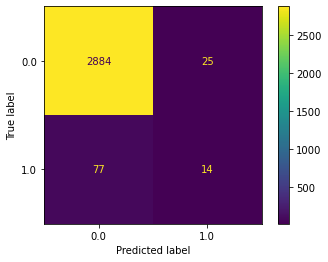

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Classification report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      2909
         Yes       0.36      0.15      0.22        91

    accuracy                           0.97      3000
   macro avg       0.67      0.57      0.60      3000
weighted avg       0.96      0.97      0.96      3000



### ROC Curve

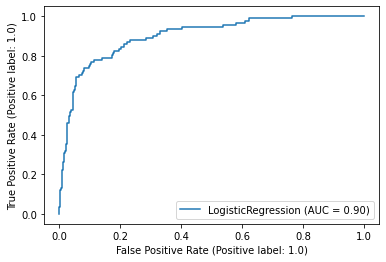

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test) 

plt.show()

### AUC Score

In [43]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.9008344697584987

In [48]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.9008344697584987

### Change threshold

Use specific threshold

In [38]:
pred_proba = clf.predict_proba(X_test)

In [50]:
df_25 = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .25})

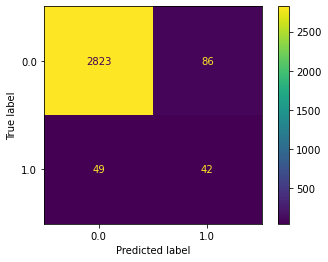

In [51]:
cm = confusion_matrix(y_test, df_25['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Classification report

In [52]:
print(classification_report(y_test, df_25['y_pred'], target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.98      0.97      0.98      2909
         Yes       0.33      0.46      0.38        91

    accuracy                           0.95      3000
   macro avg       0.66      0.72      0.68      3000
weighted avg       0.96      0.95      0.96      3000

